# Importing libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
pip install lightgbm

In [3]:
#classifier libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc

In [4]:
#other libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# Reading the dataset

In [5]:
creditData = pd.read_csv("creditcard.csv")
creditData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
creditData.shape

(284807, 31)

In [7]:
creditData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# RESAMPLING OF DATA

The dataset we have is highly imbalanced. only 0.2% of data belongs to minor group(class=1) and majority of data belongs to major group(class=0)

### Highly unbalanced dataset

Text(0.5, 1.0, 'Class distribution: No of genuine transactions vs No of fraud transactions')

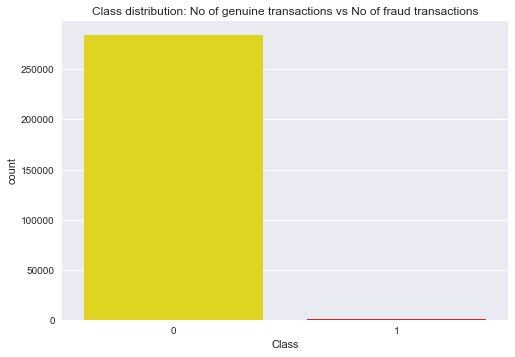

In [8]:
colors = ['#FFF000','#FF0000']

sns.countplot('Class',data=creditData, palette=colors)
plt.title('Class distribution: No of genuine transactions vs No of fraud transactions')


In [9]:
class0 = creditData[creditData['Class']==0]

len(class0)

class1 = creditData[creditData['Class']==1]

len(class1)

492

In [10]:
class0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
temp = shuffle(class0)

d1 = temp.iloc[:2000,:]

d1

frames = [d1, class1]
df_temp = pd.concat(frames)

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 281323 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2492 non-null   float64
 1   V1      2492 non-null   float64
 2   V2      2492 non-null   float64
 3   V3      2492 non-null   float64
 4   V4      2492 non-null   float64
 5   V5      2492 non-null   float64
 6   V6      2492 non-null   float64
 7   V7      2492 non-null   float64
 8   V8      2492 non-null   float64
 9   V9      2492 non-null   float64
 10  V10     2492 non-null   float64
 11  V11     2492 non-null   float64
 12  V12     2492 non-null   float64
 13  V13     2492 non-null   float64
 14  V14     2492 non-null   float64
 15  V15     2492 non-null   float64
 16  V16     2492 non-null   float64
 17  V17     2492 non-null   float64
 18  V18     2492 non-null   float64
 19  V19     2492 non-null   float64
 20  V20     2492 non-null   float64
 21  V21     2492 non-null   float6

In [12]:
df= shuffle(df_temp)

df.to_csv('creditcardsampling.csv')


<AxesSubplot:xlabel='Class', ylabel='count'>

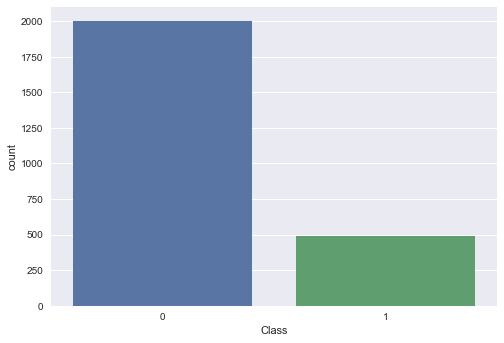

In [13]:
sns.countplot('Class', data=df)

# Resampling 

## SMOTE

In [55]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\vikra\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [14]:
from imblearn import under_sampling, over_sampling

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
oversample=SMOTE()

In [19]:
X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)

In [20]:
X=pd.DataFrame(X)
X.shape

(4000, 30)

In [21]:
Y=pd.DataFrame(Y)
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [26]:
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']

data=pd.concat([X,Y],axis=1)

d=data.values

data=pd.DataFrame(d,columns=names)

In [27]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,153443.0,-0.514697,0.527294,0.606928,0.080586,0.701425,-0.942797,0.870933,-0.273695,-0.389845,...,-0.214289,-0.428345,0.338046,-0.099375,-0.519953,0.335911,0.039609,0.116154,0.99,0.0
1,164306.0,1.958895,-0.178517,-0.447046,1.182187,-0.187471,0.137724,-0.511859,0.125005,1.013619,...,-0.192945,-0.496817,0.372688,0.323741,-0.350671,-0.950091,0.051067,-0.020878,12.99,0.0
2,115776.0,2.252717,-1.067754,-2.520500,-3.121439,0.172097,-0.597154,-0.130628,-0.275198,0.566663,...,-0.242861,-0.050586,-0.069090,-0.354785,0.467634,-0.686562,0.025456,-0.067833,30.00,0.0
3,58356.0,-0.617373,-3.216741,-1.375759,0.734786,-0.961816,0.031216,1.377865,-0.327177,-0.029448,...,0.511780,-0.697883,-1.078242,-0.362121,0.249498,1.018729,-0.289670,0.147753,1004.00,0.0
4,74725.0,-0.267764,0.082264,0.085213,-2.107518,0.996545,0.963722,0.221056,0.454725,-1.557065,...,0.479608,1.514170,0.046742,-1.313893,-0.942398,-0.291990,0.494482,0.250057,10.00,0.0


<AxesSubplot:xlabel='Class', ylabel='count'>

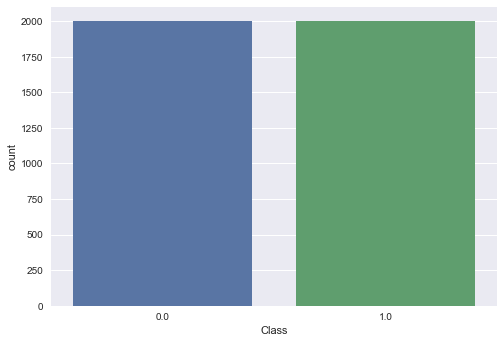

In [28]:
sns.countplot('Class', data=data)

In [29]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,88669.546064,-2.424474,1.852652,-3.623610,2.286467,-1.574791,-0.795050,-2.810470,0.409420,-1.308317,...,0.395262,-0.023673,-0.016902,-0.057956,0.024223,0.024477,0.104497,0.050929,94.481474,0.500000
std,48313.383291,5.387500,3.605151,6.055914,3.108638,4.101986,1.663365,5.479736,4.692866,2.175353,...,2.639413,1.116126,1.063625,0.536571,0.621253,0.458820,0.932866,0.441554,239.810348,0.500063
min,12.000000,-30.552380,-28.554825,-31.103685,-4.127594,-22.105532,-10.718057,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.435545,-7.263482,-7.646818,0.000000,0.000000
25%,46458.879837,-3.083917,-0.080641,-5.223391,-0.030345,-1.820068,-1.613049,-3.352048,-0.196096,-2.332081,...,-0.164613,-0.514889,-0.225395,-0.389308,-0.304782,-0.277745,-0.065146,-0.054858,2.617345,0.000000
50%,81041.000000,-0.792445,0.993419,-1.610541,1.414283,-0.435420,-0.747277,-0.739220,0.169379,-0.806630,...,0.150488,0.001937,-0.028750,-0.015045,0.041019,-0.009566,0.057594,0.039653,23.390000,0.500000
75%,136237.750000,0.880485,2.850267,0.235099,4.304863,0.437026,-0.043314,0.228387,0.859578,0.090843,...,0.663449,0.515367,0.191784,0.329429,0.366687,0.300404,0.445626,0.221637,99.030779,1.000000
max,172605.000000,2.369906,22.057729,3.394768,12.114672,16.076913,7.743086,11.922577,20.007208,5.133738,...,27.202839,8.361985,8.608802,3.629724,2.788742,2.745261,5.794075,9.823638,8787.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   float64
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

<AxesSubplot:>

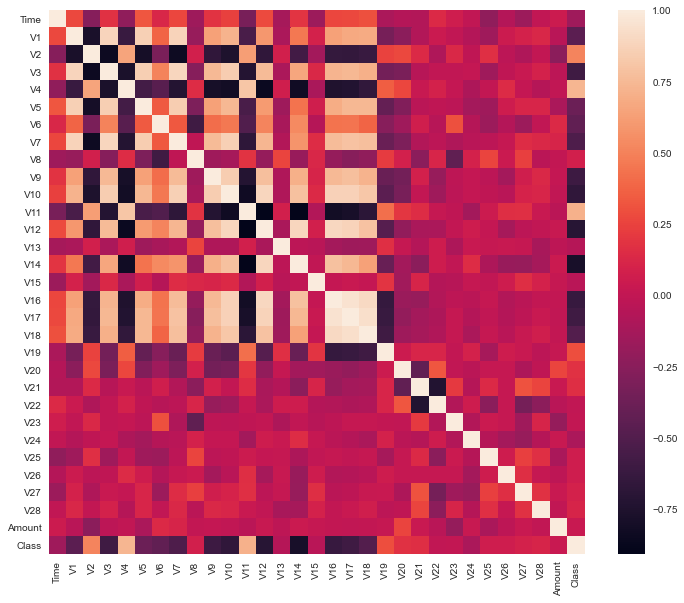

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

In [32]:
!pip install --user utils

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

# Feature Scaling

In [27]:
cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

In [28]:
scaler = StandardScaler()

frames= ['Time', 'Amount']

x= data[frames]

In [29]:
d_temp = data.drop(frames, axis=1)

temp_col=scaler.fit_transform(x)

In [30]:
scaled_col = pd.DataFrame(temp_col, columns=frames)

scaled_col.head()

,Time,Amount
0,-0.521259,-0.260813
1,0.963952,5.536260
2,-0.403610,0.995483
3,-0.277126,-0.337670
4,-0.349914,-0.316868


In [31]:
d_scaled = pd.concat([scaled_col, d_temp], axis =1)
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.521259,-0.260813,1.183605,-0.039115,-0.347008,0.902737,0.659376,1.128346,-0.079395,0.275373,...,-0.106261,-0.153343,-0.337099,-0.306650,-1.707810,0.828323,-0.223956,0.023302,-0.007843,0.0
1,0.963952,5.536260,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,...,2.908374,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1.0
2,-0.403610,0.995483,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,...,-1.463994,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,1.0
3,-0.277126,-0.337670,-0.921274,-0.126600,1.312882,-1.913126,-0.831781,-0.292016,-0.468089,0.439675,...,-0.251038,0.012479,0.320141,-0.254568,0.254741,0.519049,-0.033694,-0.051220,-0.048121,0.0
4,-0.349914,-0.316868,1.181530,-1.206439,1.630104,-0.066998,-2.073744,0.371168,-1.507023,0.369564,...,-0.511322,-0.532059,-0.694932,0.100393,0.578108,0.050412,1.001239,0.010433,0.013839,0.0


In [32]:
y = data['Class']

d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.521259,-0.260813,1.183605,-0.039115,-0.347008,0.902737,0.659376,1.128346,-0.079395,0.275373,...,-0.106261,-0.153343,-0.337099,-0.306650,-1.707810,0.828323,-0.223956,0.023302,-0.007843,0.0
1,0.963952,5.536260,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,...,2.908374,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1.0
2,-0.403610,0.995483,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,...,-1.463994,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,1.0
3,-0.277126,-0.337670,-0.921274,-0.126600,1.312882,-1.913126,-0.831781,-0.292016,-0.468089,0.439675,...,-0.251038,0.012479,0.320141,-0.254568,0.254741,0.519049,-0.033694,-0.051220,-0.048121,0.0
4,-0.349914,-0.316868,1.181530,-1.206439,1.630104,-0.066998,-2.073744,0.371168,-1.507023,0.369564,...,-0.511322,-0.532059,-0.694932,0.100393,0.578108,0.050412,1.001239,0.010433,0.013839,0.0


# Dimensionality reduction

In [33]:
pca = PCA(n_components=7)

In [34]:
X_temp_reduced = pca.fit_transform(d_scaled)

In [35]:
pca.explained_variance_ratio_

array([0.68060565, 0.10066604, 0.07584457, 0.03283645, 0.032695  ,
       0.01151755, 0.00800084])

In [36]:
pca.explained_variance_

array([217.56666931,  32.17953907,  24.24494935,  10.49670407,
        10.45148887,   3.68177114,   2.55759947])

In [37]:
names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']
X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank
0,-10.042051,0.633057,1.069664,0.556921,-0.925517,-0.611175,-0.020739
1,-1.283559,-2.388003,-1.253578,-1.660002,0.859061,3.274440,6.350409
2,-9.673638,1.022138,1.540054,1.096398,-0.684387,1.962231,0.826192
3,-9.676189,1.029720,2.017454,1.238513,-0.980591,-0.158462,-0.951806
4,-10.119761,0.713660,1.226484,1.326858,-1.270435,-0.729471,-0.055793


In [38]:
Y=d_scaled['Class']
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()
new_data.shape

(4000, 8)

In [39]:
new_data.to_csv('finaldata.csv')

# Splitting Final Data

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.30, random_state = 42)

In [41]:
X_train.shape, X_test.shape

((2800, 7), (1200, 7))

# MODELS

# 1.K Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)


In [43]:
print(classification_report(y_test,y_pred_knn))

print(confusion_matrix(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       626
         1.0       0.96      0.95      0.96       574

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[606  20]
 [ 28 546]]


### HYPERPARAMETER TUNING

In [44]:
knn_param=KNeighborsClassifier()
knn_params={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn=GridSearchCV(knn_param,param_grid=knn_params)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_


{'algorithm': 'auto', 'n_neighbors': 4}

In [45]:
knmodel = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 2)
knmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
ypred_kn = knmodel.predict(X_test)
print(classification_report(y_test,ypred_kn))

print(confusion_matrix(y_test,ypred_kn))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       626
         1.0       0.99      0.95      0.97       574

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

[[618   8]
 [ 28 546]]


# 2.Logistic Regression

In [47]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([0., 1., 0., ..., 0., 0., 1.])

In [48]:
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       626
         1.0       0.99      0.95      0.97       574

    accuracy                           0.98      1200
   macro avg       0.98      0.97      0.98      1200
weighted avg       0.98      0.98      0.98      1200

[[623   3]
 [ 26 548]]


### HYPERPARAMETER TUNING

In [49]:
lr= LogisticRegression()
param_grid = {
'penalty' : ['l1', 'l2', 'none'],
'C' : np.logspace(-4, 4, 20),
'solver' : ['lbfgs','newton-cg','liblinear'],
'max_iter' : [100, 1000,2500]
}

gs = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1)
best = gs.fit(X_train, y_train)
best.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


LogisticRegression(C=10000.0, solver='liblinear')

In [50]:
ypredlr= gs.predict(X_test)

In [51]:
print(classification_report(y_test,ypredlr))
print(confusion_matrix(y_test,ypredlr))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       626
         1.0       0.99      0.96      0.97       574

    accuracy                           0.97      1200
   macro avg       0.98      0.97      0.97      1200
weighted avg       0.98      0.97      0.97      1200

[[621   5]
 [ 25 549]]


# Support Vector Machine

In [52]:
svc= SVC(kernel='rbf')

In [53]:
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc

array([0., 1., 0., ..., 0., 0., 1.])

In [54]:
print(classification_report(y_test,y_pred_svc))

print(confusion_matrix(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       626
         1.0       0.99      0.94      0.97       574

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

[[623   3]
 [ 34 540]]


In [55]:
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

In [56]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [59]:
svc_param=SVC(kernel='rbf',gamma=0.01,C=1000)

svc_param.fit(X_train,y_train)
y_pred_svc2=svc_param.predict(X_test)
print(classification_report(y_test,y_pred_svc2))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       626
         1.0       0.98      0.96      0.97       574

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# Decision Tree Classifier

In [60]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred_dtree))

print(confusion_matrix(y_test,y_pred_dtree))


              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       626
         1.0       0.95      0.96      0.95       574

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[597  29]
 [ 23 551]]


### HYPERPARAMETER TUNING

In [62]:
d_tree_param=DecisionTreeClassifier()

tree_parameters={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),
                 'min_samples_leaf':list(range(5,7,1))}

grid_tree=GridSearchCV(d_tree_param,tree_parameters)

grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6]})

In [63]:
y_pred_dtree2=grid_tree.predict(X_test)

print(classification_report(y_test,y_pred_dtree2))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       626
         1.0       0.97      0.95      0.96       574

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



# Random Forest

In [64]:
randomforest=RandomForestClassifier(n_estimators=5)

randomforest.fit(X_train,y_train)

y_pred_rf=randomforest.predict(X_test)

In [65]:
print(confusion_matrix(y_test,y_pred_rf))

print(classification_report(y_test,y_pred_rf))

[[614  12]
 [ 22 552]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       626
         1.0       0.98      0.96      0.97       574

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# KNearest Neighbors

In [66]:
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)
y_pred_knn


array([0., 1., 0., ..., 0., 0., 1.])

In [67]:
print(classification_report(y_test,y_pred_knn))

print(confusion_matrix(y_test,y_pred_knn))


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       626
         1.0       0.96      0.95      0.96       574

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[606  20]
 [ 28 546]]


### HYPERPARAMETER TUNING

In [68]:
knn_param=KNeighborsClassifier()

knn_params={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knn=GridSearchCV(knn_param,param_grid=knn_params)

grid_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4]})

In [69]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 4}

In [70]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [71]:
pred_knn2 = knn.predict(X_test)

In [72]:
print(confusion_matrix(y_test,pred_knn2))

print(classification_report(y_test,pred_knn2))


[[616  10]
 [ 29 545]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       626
         1.0       0.98      0.95      0.97       574

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# XGBoost

In [73]:
xgb=XGBClassifier()

xgb.fit(X_train,y_train)

y_pred_xg=xgb.predict(X_test)

[19:02:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [74]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       626
         1.0       0.98      0.97      0.97       574

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



#  LGB

In [75]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train, free_raw_data= False)

lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data= False)

In [76]:
parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300

In [77]:

lgb_train = lgb.Dataset(X_train, y_train)

lgb_test = lgb.Dataset(X_test, y_test)

In [81]:
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)


[LightGBM] [Info] Number of positive: 1426, number of negative: 1374
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509286 -> initscore=0.037147
[LightGBM] [Info] Start training from score 0.037147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

In [83]:
import sklearn 

y_prob = clf.predict(X_test)

y_pred = sklearn.preprocessing.binarize(np.reshape(y_prob, (-1,1)), threshold= 0.5)


In [84]:
accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       626
         1.0       0.98      0.97      0.97       574

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# ROC-AUC

In [87]:
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,ypredlr)

svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,y_pred_svc2)

dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_test,y_pred_dtree2)

rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,y_pred_rf)

knn_fpr,knn_tpr,rf_threshold=roc_curve(y_test,pred_knn2)

xg_fpr,xg_tpr,xg_threshold=roc_curve(y_test,y_pred_xg)

lgb_fpr,lgb_tpr,lgb_threshold=roc_curve(y_test,y_pred)

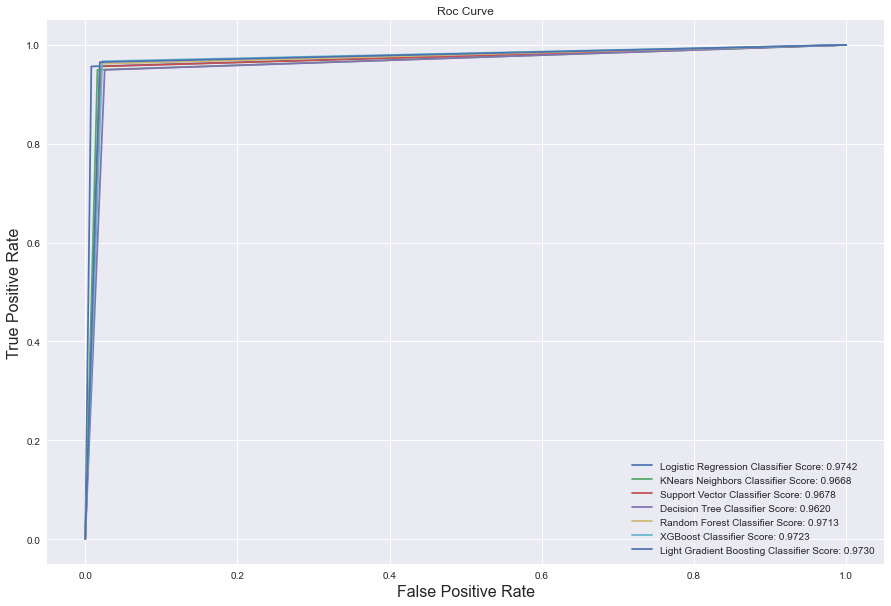

In [93]:
plt.figure(figsize=(15,10))

plt.title("Roc Curve")

plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, ypredlr)))
plt.plot(knn_fpr,knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, pred_knn2)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, y_pred_svc2)))
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, y_pred_dtree2)))
plt.plot(rf_fpr,rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, y_pred_rf)))
plt.plot(xg_fpr,xg_tpr, label='XGBoost Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, y_pred_xg)))
plt.plot(lgb_fpr,lgb_tpr, label='Light Gradient Boosting Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, y_pred)))


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend()


plt.show()

Logistic Regression and SVM are better as per the roc curve

### Lets compare roc curve for 
> 1.Logistic Regression and 2.Support Vector Machine

Text(0.5, 1.0, 'Support Vector Machine- ROC curve')

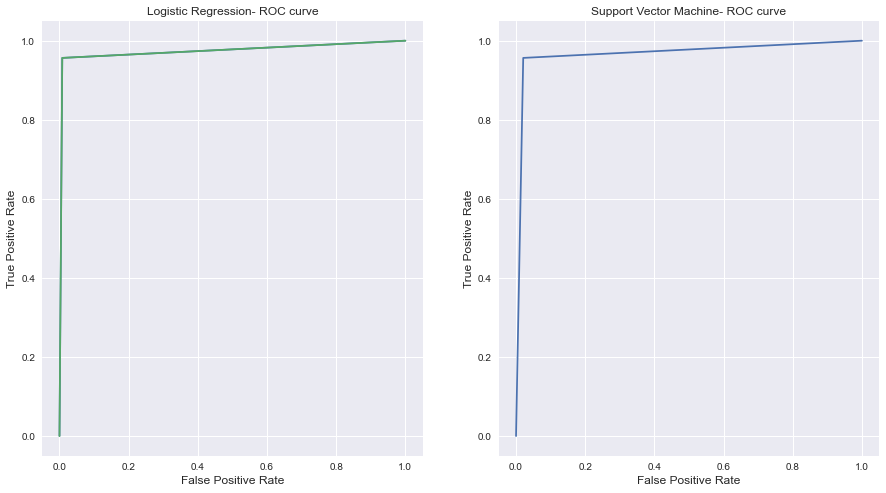

In [115]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, ypredlr)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Logistic Regression- ROC curve')


plt.subplot(1,2,1)
plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, ypredlr)))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Logistic Regression- ROC curve')


plt.subplot(1,2,2)
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(metrics.roc_auc_score(y_test, y_pred_svc2)))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Support Vector Machine- ROC curve')


In [120]:
print("Precision Score for LOGISTIC REGRESSION: ", precision_score(y_test,ypredlr))
print("Precision Score for SUPPORT VECTOR MACHINE: ", precision_score(y_test,y_pred_svc))

print("-"*100)

print("Recall Score for LOGISTIC REGRESSION: ", recall_score(y_test,ypredlr))
print("Recall Score for SUPPORT VECTOR MACHINE: ", precision_score(y_test,y_pred_svc))

print("-"*100)

print("Accuracy Score for LOGISTIC REGRESSION: ", accuracy_score(y_test,ypredlr))
print("Accuracy Score for SUPPORT VECTOR MACHINE: ", accuracy_score(y_test,y_pred_svc))

Precision Score for LOGISTIC REGRESSION:  0.9909747292418772
Precision Score for SUPPORT VECTOR MACHINE:  0.994475138121547
----------------------------------------------------------------------------------------------------
Recall Score for LOGISTIC REGRESSION:  0.9564459930313589
Recall Score for SUPPORT VECTOR MACHINE:  0.994475138121547
----------------------------------------------------------------------------------------------------
Accuracy Score for LOGISTIC REGRESSION:  0.975
Accuracy Score for SUPPORT VECTOR MACHINE:  0.9691666666666666


> ### From above metrics, it is clear that <u>Logistic Regression </u> model is a better choice

# Saving the model to disk

In [123]:
import pickle

In [124]:
pickle.dump(svc_param, open('model.pkl','wb'))

In [125]:
model=pickle.load(open('model.pkl','rb'))